<a href="https://colab.research.google.com/github/jw9603/ECE5402_41/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd ./drive/MyDrive/패턴인식론

/content/drive/MyDrive/패턴인식론


### 1. 과제 2 사진 종류별 1장씩을 이용하여 R, G, B산포도(2차원, 3차원)을 그려보고, 공분산을 구해본 후, 서로 독립이 되도록 변환처리 한 후 산포도를 그려서 변환 처리 전의 것과 비교 관찰해 보시오. (2D는 R-G, R-B, G-B 3종, 3D는 R-G-B)


#### 1.1 새벽 사진 R,G, B산포도 그리기

In [284]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

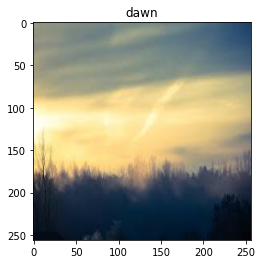

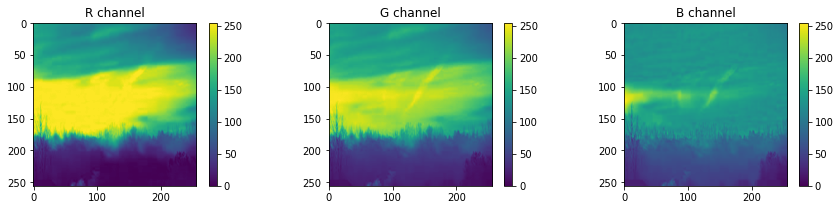

In [134]:
# 새벽
img0 = cv2.imread('dawn.png')
img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
plt.title('dawn')
img0 = cv2.resize(img0,(256,256))
plt.imshow(img0)
r_0 = img0[:,:,0]
g_0 = img0[:,:,1]
b_0 = img0[:,:,2]

fig = plt.figure(figsize=(15,3))

for i, c in zip(range(3), 'RGB'):
    ax = fig.add_subplot(1, 3, i + 1)
    plt.imshow(img0[:, :, i], vmin=0, vmax=255)
    plt.colorbar()
    plt.title(f'{c} channel')

plt.show()


In [286]:
%cd ../

/content/drive/MyDrive/패턴인식론


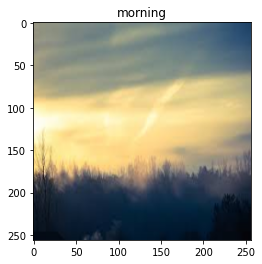

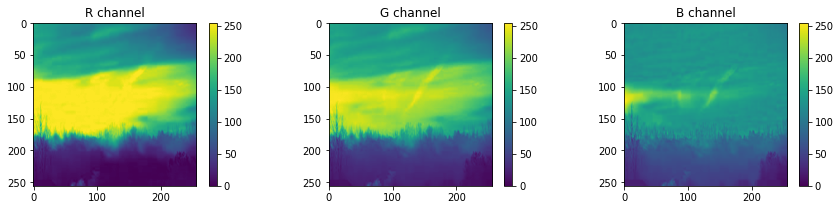

In [288]:
# 아침
img1 = cv2.imread('morn.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.title('morning')
img1 = cv2.resize(img1,(256,256))
plt.imshow(img1)
r_1 = img1[:,:,0]
g_1 = img1[:,:,1]
b_1 = img1[:,:,2]

fig = plt.figure(figsize=(15,3))

for i, c in zip(range(3), 'RGB'):
    ax = fig.add_subplot(1, 3, i + 1)
    plt.imshow(img0[:, :, i], vmin=0, vmax=255)
    plt.colorbar()
    plt.title(f'{c} channel')

plt.show()

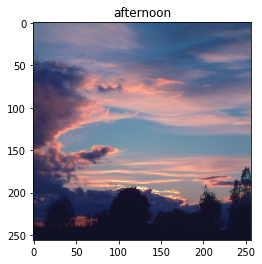

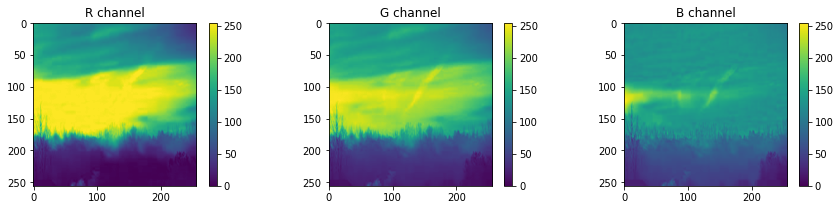

In [290]:
# 오후
img2 = cv2.imread('afternoon.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.title('afternoon')
img2 = cv2.resize(img2,(256,256))
plt.imshow(img2)
r_2 = img2[:,:,0]
g_2 = img2[:,:,1]
b_2 = img2[:,:,2]

fig = plt.figure(figsize=(15,3))

for i, c in zip(range(3), 'RGB'):
    ax = fig.add_subplot(1, 3, i + 1)
    plt.imshow(img0[:, :, i], vmin=0, vmax=255)
    plt.colorbar()
    plt.title(f'{c} channel')

plt.show()

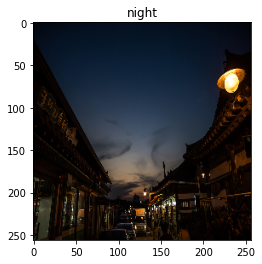

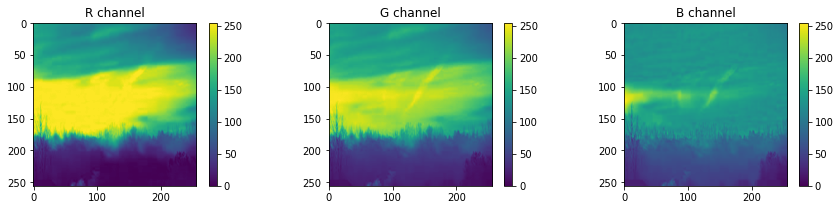

In [291]:
# 밤
img3 = cv2.imread('night.png')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.title('night')
img3 = cv2.resize(img3,(256,256))
plt.imshow(img3)
r_3 = img3[:,:,0]
g_3 = img3[:,:,1]
b_3 = img3[:,:,2]

fig = plt.figure(figsize=(15,3))

for i, c in zip(range(3), 'RGB'):
    ax = fig.add_subplot(1, 3, i + 1)
    plt.imshow(img0[:, :, i], vmin=0, vmax=255)
    plt.colorbar()
    plt.title(f'{c} channel')

plt.show()

In [375]:
import numpy as np
r_0 = r_0.reshape(-1,1)
g_0 = g_0.reshape(-1,1)
b_0 = b_0.reshape(-1,1)
print(r_0.shape)
rg = np.concatenate((r_0,g_0),axis=1)
gb = np.concatenate((g_0,b_0),axis=1)
rb = np.concatenate((r_0,b_0),axis=1)
rgb = np.concatenate((r_0,g_0,b_0),axis=1)
r_00 = r_0.reshape(-1)
g_00 = g_0.reshape(-1)
b_00 = b_0.reshape(-1)

(65536, 1)


In [376]:
import numpy as np
import pandas as pd
# plotly 라이브러리 불러오기
import plotly.offline as pyo
import plotly.graph_objs as go

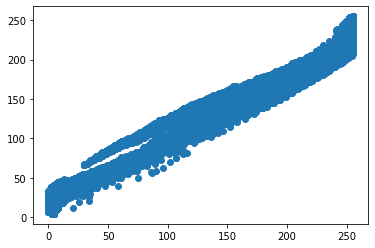

In [377]:
plt.scatter(r_0,g_0)
plt.show()

In [378]:
## red, green의 공분산 구하기, 공분산을 구하기 위하여 1차원으로 변환
print(r_00)
cov_rg = np.cov(r_00,g_00)

print(cov_rg)
print(cov_rg[0,1])
# correlated_rg = n
print(np.corrcoef(r_00,g_00))


#eigen value, eigen vector 
values, vectors = np.linalg.eig(cov_rg)
print('eigen values',values)
print('-------')
print('eigen vectors',vectors)


# 서로 uncorrelated이 되도록 변환처리
r_0_avg = np.mean(r_00)
print(r_0_avg)
r_0_var = np.var(r_00)
print(r_0_var)
un_r_00 = 100*r_00 + 0.02
un_r_0 = 100 * r_0 + 0.02
print(np.corrcoef(un_r_00,g_00))

[150 149 149 ...   3   3   3]
[[8033.56742747 6421.27094076]
 [6421.27094076 5258.00801691]]
6421.270940757444
[[1.        0.9879982]
 [0.9879982 1.       ]]
eigen values [13215.3122868     76.26315758]
-------
eigen vectors [[ 0.77821754 -0.6279948 ]
 [ 0.6279948   0.77821754]]
136.31884765625
8033.444844961166
[[1.         0.04035451]
 [0.04035451 1.        ]]


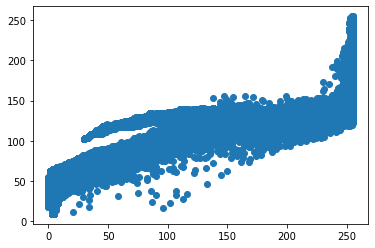

In [380]:
plt.scatter(r_0,b_0)
plt.show()

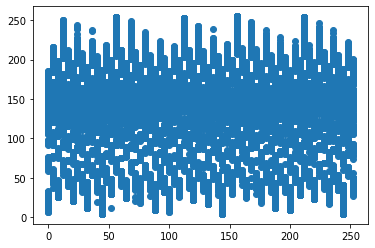

In [218]:
plt.scatter(un_r_0,g_0)
plt.show()

In [219]:
## red, blue의 공분산 구하기, 공분산을 구하기 위하여 1차원으로 변환
print(r_00)
cov_rb = np.cov(r_00,b_00)

print(cov_rb)
print(cov_rb[0,1])
# correlated_rg = n
print(np.corrcoef(r_00,b_00))


#eigen value, eigen vector 
values, vectors = np.linalg.eig(cov_rb)
print('eigen values',values)
print('-------')
print('eigen vectors',vectors)


# 서로 uncorrelated이 되도록 변환처리
r_0_avg = np.mean(r_00)
print(r_0_avg)
r_0_var = np.var(r_00)
print(r_0_var)
un_r_00 = 100*r_00 + 0.02
un_r_0 = 100 * r_0 + 0.02
print(np.corrcoef(un_r_00,b_00))

[150 149 149 ...   3   3   3]
[[8033.56742747 3213.889766  ]
 [3213.889766   1703.14932515]]
3213.889766002005
[[1.         0.86886118]
 [0.86886118 1.        ]]
eigen values [9379.19374967  357.52300295]
-------
eigen vectors [[ 0.92241266 -0.38620576]
 [ 0.38620576  0.92241266]]
136.31884765625
8033.444844961166
[[1.         0.04340813]
 [0.04340813 1.        ]]


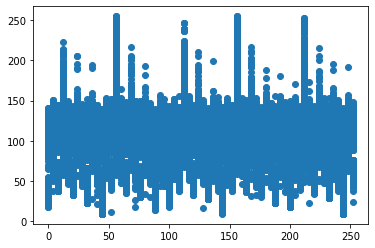

In [220]:
plt.scatter(un_r_0,b_0)
plt.show()

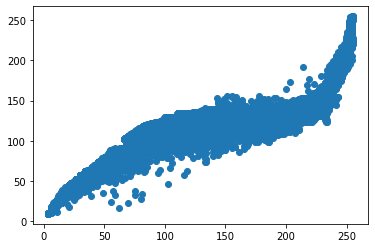

In [122]:
plt.scatter(g_0,b_0)
plt.show()

In [221]:
## greeb, blue의 공분산 구하기, 공분산을 구하기 위하여 1차원으로 변환
print(g_00)
cov_rb = np.cov(g_00,b_00)

print(cov_gb)
print(cov_gb[0,1])
# correlated_rg = n
print(np.corrcoef(g_00,b_00))


#eigen value, eigen vector 
values, vectors = np.linalg.eig(cov_gb)
print('eigen values',values)
print('-------')
print('eigen vectors',vectors)


# 서로 uncorrelated이 되도록 변환처리
g_0_avg = np.mean(g_00)
print(g_0_avg)
g_0_var = np.var(g_00)
print(g_0_var)
un_g_00 = 100*g_00 + 0.02
un_g_0 = 100 * g_0 + 0.02
print(np.corrcoef(un_g_00,b_00))

[147 146 146 ...   4   4   4]
[[5258.00801691 2769.88517225]
 [2769.88517225 1703.14932515]]
2769.885172251763
[[1.         0.92560306]
 [0.92560306 1.        ]]
eigen values [6771.70597745  189.45136461]
-------
eigen vectors [[ 0.87751554 -0.47954821]
 [ 0.47954821  0.87751554]]
135.18515014648438
5257.927786073647
[[ 1.         -0.02271045]
 [-0.02271045  1.        ]]


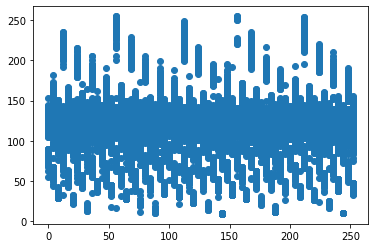

In [222]:
plt.scatter(un_g_00,b_00)
plt.show()

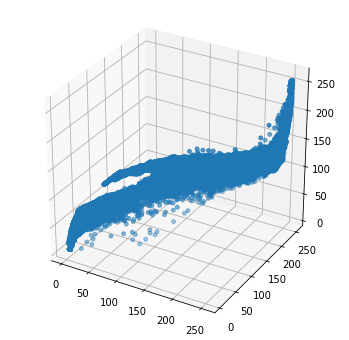

In [232]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
c = np.random.randint(-128,128,size=(256,))

ax.scatter(r_00,g_00,b_00,marker='o',s=15,cmap='coolwarm')

In [238]:
rgb_0 = np.concatenate((r_0,g_0,b_0),axis=1)
cov_rgb = np.cov(rgb_0)

In [239]:
print(cov_rgb.shape)

(65536, 65536)


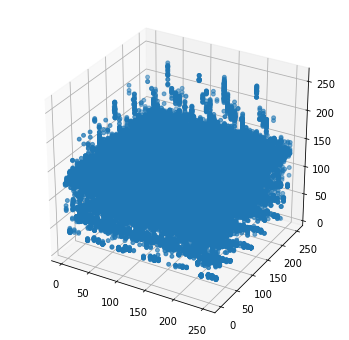

In [240]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
c = np.random.randint(-128,128,size=(256,))

ax.scatter(un_r_00,un_g_00,b_00,marker='o',s=15,cmap='coolwarm')

아침

In [292]:
import numpy as np
r_1 = r_1.reshape(-1,1)
g_1 = g_1.reshape(-1,1)
b_1 = b_1.reshape(-1,1)
print(r_0.shape)
rg = np.concatenate((r_1,g_1),axis=1)
gb = np.concatenate((g_1,b_1),axis=1)
rb = np.concatenate((r_1,b_1),axis=1)
rgb = np.concatenate((r_1,g_1,b_1),axis=1)
r_11 = r_1.reshape(-1)
g_11 = g_1.reshape(-1)
b_11 = b_1.reshape(-1)

(65536, 1)


In [293]:
import numpy as np
import pandas as pd
# plotly 라이브러리 불러오기
import plotly.offline as pyo
import plotly.graph_objs as go

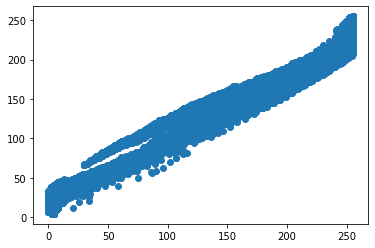

In [294]:
plt.scatter(r_1,g_1)
plt.show()

In [295]:
## red, green의 공분산 구하기, 공분산을 구하기 위하여 1차원으로 변환
print(r_11)
cov_rg = np.cov(r_11,g_11)

print(cov_rg)
print(cov_rg[0,1])
# correlated_rg = n
print(np.corrcoef(r_11,g_11))


#eigen value, eigen vector 
values, vectors = np.linalg.eig(cov_rg)
print('eigen values',values)
print('-------')
print('eigen vectors',vectors)


# 서로 uncorrelated이 되도록 변환처리
r_1_avg = np.mean(r_11)
print(r_1_avg)
r_1_var = np.var(r_11)
print(r_1_var)
un_r_11 = 100*r_11 + 0.02
un_r_1 = 100 * r_1 + 0.02
print(np.corrcoef(un_r_11,g_11))

[150 149 149 ...   3   3   3]
[[8033.56742747 6421.27094076]
 [6421.27094076 5258.00801691]]
6421.270940757444
[[1.        0.9879982]
 [0.9879982 1.       ]]
eigen values [13215.3122868     76.26315758]
-------
eigen vectors [[ 0.77821754 -0.6279948 ]
 [ 0.6279948   0.77821754]]
136.31884765625
8033.444844961166
[[1.         0.04035451]
 [0.04035451 1.        ]]


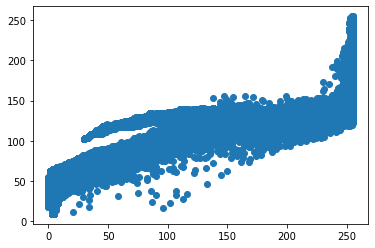

In [381]:
plt.scatter(r_1,b_1)
plt.show()

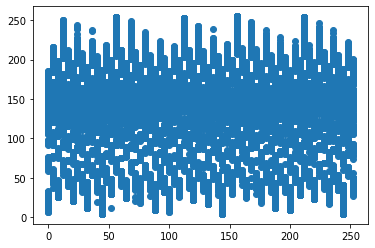

In [297]:
plt.scatter(un_r_1,g_1)
plt.show()

In [298]:
## red, blue의 공분산 구하기, 공분산을 구하기 위하여 1차원으로 변환
print(r_11)
cov_rb = np.cov(r_11,b_11)

print(cov_rb)
print(cov_rb[0,1])
# correlated_rg = n
print(np.corrcoef(r_11,b_11))


#eigen value, eigen vector 
values, vectors = np.linalg.eig(cov_rb)
print('eigen values',values)
print('-------')
print('eigen vectors',vectors)


# 서로 uncorrelated이 되도록 변환처리
r_1_avg = np.mean(r_11)
print(r_1_avg)
r_1_var = np.var(r_11)
print(r_1_var)
un_r_11 = 100*r_11 + 0.02
un_r_1 = 100 * r_1 + 0.02
print(np.corrcoef(un_r_11,b_11))

[150 149 149 ...   3   3   3]
[[8033.56742747 3213.889766  ]
 [3213.889766   1703.14932515]]
3213.889766002005
[[1.         0.86886118]
 [0.86886118 1.        ]]
eigen values [9379.19374967  357.52300295]
-------
eigen vectors [[ 0.92241266 -0.38620576]
 [ 0.38620576  0.92241266]]
136.31884765625
8033.444844961166
[[1.         0.04340813]
 [0.04340813 1.        ]]


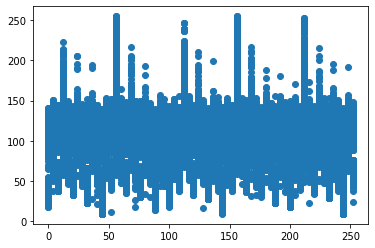

In [299]:
plt.scatter(un_r_1,b_1)
plt.show()

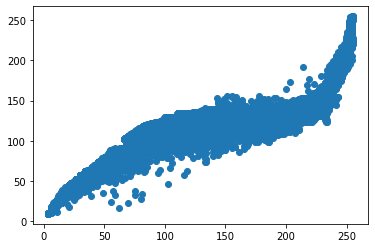

In [300]:
plt.scatter(g_1,b_1)
plt.show()

In [301]:
## greeb, blue의 공분산 구하기, 공분산을 구하기 위하여 1차원으로 변환
print(g_11)
cov_gb = np.cov(g_11,b_11)

print(cov_gb)
print(cov_gb[0,1])
# correlated_rg = n
print(np.corrcoef(g_11,b_11))


#eigen value, eigen vector 
values, vectors = np.linalg.eig(cov_gb)
print('eigen values',values)
print('-------')
print('eigen vectors',vectors)


# 서로 uncorrelated이 되도록 변환처리
g_1_avg = np.mean(g_11)
print(g_1_avg)
g_1_var = np.var(g_11)
print(g_1_var)
un_g_11 = 100*g_11 + 0.02
un_g_1 = 100 * g_1 + 0.02
print(np.corrcoef(un_g_11,b_11))

[147 146 146 ...   4   4   4]
[[5258.00801691 2769.88517225]
 [2769.88517225 1703.14932515]]
2769.885172251763
[[1.         0.92560306]
 [0.92560306 1.        ]]
eigen values [6771.70597745  189.45136461]
-------
eigen vectors [[ 0.87751554 -0.47954821]
 [ 0.47954821  0.87751554]]
135.18515014648438
5257.927786073647
[[ 1.         -0.02271045]
 [-0.02271045  1.        ]]


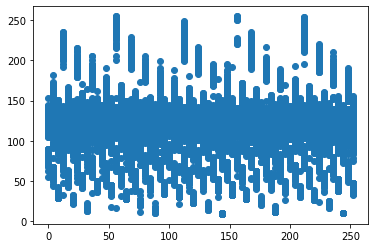

In [302]:
plt.scatter(un_g_11,b_11)
plt.show()

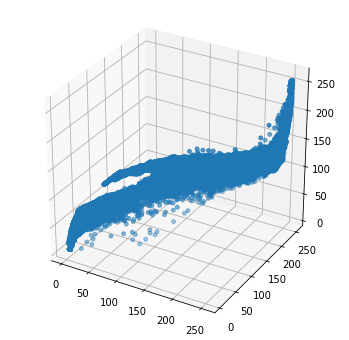

In [303]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
c = np.random.randint(-128,128,size=(256,))

ax.scatter(r_11,g_11,b_11,marker='o',s=15,cmap='coolwarm')

In [304]:
rgb_1 = np.concatenate((r_1,g_1,b_1),axis=1)
cov_rgb = np.cov(rgb_1)

In [305]:
print(cov_rgb.shape)

(65536, 65536)


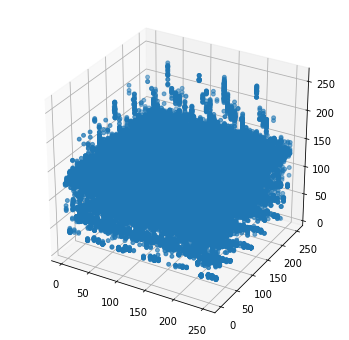

In [306]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
c = np.random.randint(-128,128,size=(256,))

ax.scatter(un_r_11,un_g_11,b_11,marker='o',s=15,cmap='coolwarm')

오후

In [307]:
import numpy as np
r_2 = r_2.reshape(-1,1)
g_2 = g_2.reshape(-1,1)
b_2 = b_2.reshape(-1,1)
print(r_2.shape)
rg = np.concatenate((r_2,g_2),axis=1)
gb = np.concatenate((g_2,b_2),axis=1)
rb = np.concatenate((r_2,b_2),axis=1)
rgb = np.concatenate((r_2,g_2,b_2),axis=1)
r_22 = r_2.reshape(-1)
g_22 = g_2.reshape(-1)
b_22 = b_2.reshape(-1)

(65536, 1)


In [ ]:
import numpy as np
import pandas as pd
# plotly 라이브러리 불러오기
import plotly.offline as pyo
import plotly.graph_objs as go

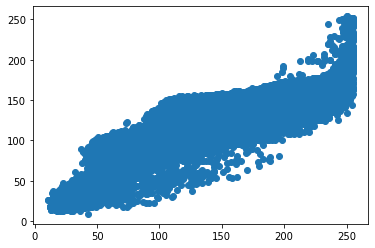

In [308]:
plt.scatter(r_2,g_2)
plt.show()

In [325]:
## red, green의 공분산 구하기, 공분산을 구하기 위하여 1차원으로 변환
print(r_22)
cov_rg = np.cov(r_22,g_22)

print(cov_rg)
print(cov_rg[0,1])
# correlated_rg = n
print(np.corrcoef(r_22,g_22))


#eigen value, eigen vector 
values, vectors = np.linalg.eig(cov_rg)
print('eigen values',values)
print('-------')
print('eigen vectors',vectors)


# 서로 uncorrelated이 되도록 변환처리
r_2_avg = np.mean(r_22)
print(r_2_avg)
r_2_var = np.var(r_22)
print(r_2_var)
un_r_22 = 100*r_22 + 35
un_r_2 = 100 * r_2 + 35
print(np.corrcoef(un_r_22,g_22))

[ 93 100  94 ...  16  16  15]
[[4195.54469342 2903.61213934]
 [2903.61213934 2467.94245531]]
2903.612139337967
[[1.         0.90235393]
 [0.90235393 1.        ]]
eigen values [6361.11905935  302.36808939]
-------
eigen vectors [[ 0.80160515 -0.59785381]
 [ 0.59785381  0.80160515]]
108.89192199707031
4195.480674491962
[[ 1.         -0.00348985]
 [-0.00348985  1.        ]]


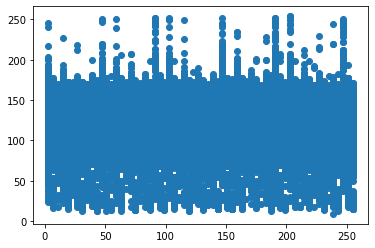

In [327]:
plt.scatter(un_r_2,g_2)
plt.show()

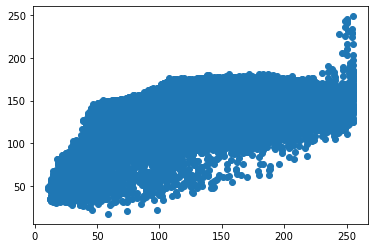

In [332]:
plt.scatter(r_2,b_2)
plt.show()

In [333]:
## red, blue의 공분산 구하기, 공분산을 구하기 위하여 1차원으로 변환
print(r_22)
cov_rb = np.cov(r_22,b_22)

print(cov_rb)
print(cov_rb[0,1])
# correlated_rg = n
print(np.corrcoef(r_22,b_22))


#eigen value, eigen vector 
values, vectors = np.linalg.eig(cov_rb)
print('eigen values',values)
print('-------')
print('eigen vectors',vectors)


# 서로 uncorrelated이 되도록 변환처리
r_2_avg = np.mean(r_22)
print(r_2_avg)
r_2_var = np.var(r_22)
print(r_2_var)
un_r_22 = 100*r_22 + 35
un_r_2 = 100 * r_2 + 35
print(np.corrcoef(un_r_22,b_22))

[ 93 100  94 ...  16  16  15]
[[4195.54469342 2145.86074277]
 [2145.86074277 1957.32003009]]
2145.8607427721395
[[1.         0.74881828]
 [0.74881828 1.        ]]
eigen values [5496.58333603  656.28138749]
-------
eigen vectors [[ 0.8551065  -0.51845238]
 [ 0.51845238  0.8551065 ]]
108.89192199707031
4195.480674491962
[[ 1.         -0.00836724]
 [-0.00836724  1.        ]]


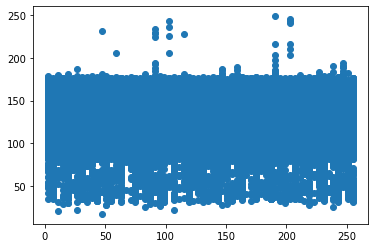

In [334]:
plt.scatter(un_r_2,b_2)
plt.show()

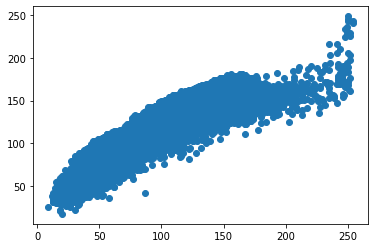

In [335]:
plt.scatter(g_2,b_2)
plt.show()

In [336]:
## greeb, blue의 공분산 구하기, 공분산을 구하기 위하여 1차원으로 변환
print(g_22)
cov_rb = np.cov(g_22,b_22)

print(cov_gb)
print(cov_gb[0,1])
# correlated_rg = n
print(np.corrcoef(g_22,b_22))


#eigen value, eigen vector 
values, vectors = np.linalg.eig(cov_gb)
print('eigen values',values)
print('-------')
print('eigen vectors',vectors)


# 서로 uncorrelated이 되도록 변환처리
g_2_avg = np.mean(g_22)
print(g_2_avg)
g_2_var = np.var(g_22)
print(g_2_var)
un_g_22 = 100*g_22 + 35
un_g_2 = 100 * g_2 + 35
print(np.corrcoef(un_g_22,b_22))

[118 115 118 ...  17  17  17]
[[5258.00801691 2769.88517225]
 [2769.88517225 1703.14932515]]
2769.885172251763
[[1.         0.94534108]
 [0.94534108 1.        ]]
eigen values [6771.70597745  189.45136461]
-------
eigen vectors [[ 0.87751554 -0.47954821]
 [ 0.47954821  0.87751554]]
101.967041015625
2467.9047974944115
[[ 1.         -0.04593902]
 [-0.04593902  1.        ]]


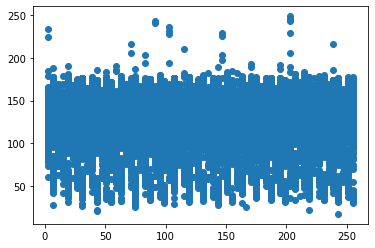

In [337]:
plt.scatter(un_g_22,b_22)
plt.show()

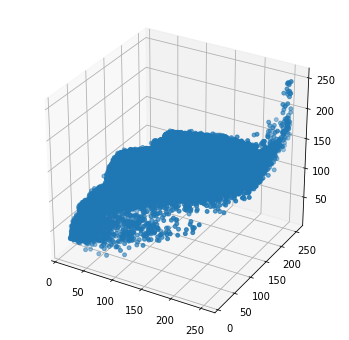

In [338]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
c = np.random.randint(-128,128,size=(256,))

ax.scatter(r_22,g_22,b_22,marker='o',s=15,cmap='coolwarm')

In [339]:
rgb_2 = np.concatenate((r_2,g_2,b_2),axis=1)
cov_rgb = np.cov(rgb_2)

In [340]:
print(cov_rgb.shape)

(65536, 65536)


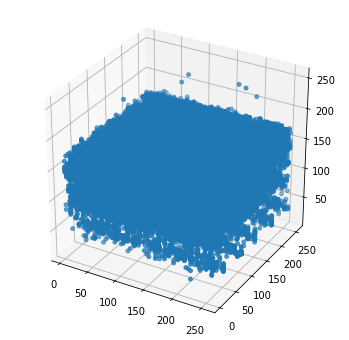

In [341]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
c = np.random.randint(-128,128,size=(256,))

ax.scatter(un_r_22,un_g_22,b_22,marker='o',s=15,cmap='coolwarm')

밤

In [342]:
import numpy as np
r_3 = r_3.reshape(-1,1)
g_3 = g_3.reshape(-1,1)
b_3 = b_3.reshape(-1,1)
print(r_3.shape)
rg = np.concatenate((r_3,g_3),axis=1)
gb = np.concatenate((g_3,b_3),axis=1)
rb = np.concatenate((r_3,b_3),axis=1)
rgb = np.concatenate((r_3,g_3,b_3),axis=1)
r_33 = r_3.reshape(-1)
g_33 = g_3.reshape(-1)
b_33 = b_3.reshape(-1)

(65536, 1)


In [344]:
import numpy as np
import pandas as pd
# plotly 라이브러리 불러오기
import plotly.offline as pyo
import plotly.graph_objs as go

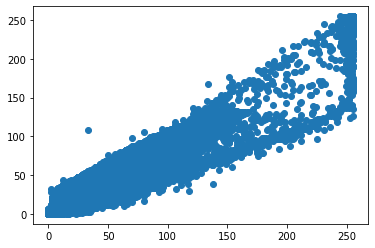

In [343]:
plt.scatter(r_3,g_3)
plt.show()

In [351]:
## red, green의 공분산 구하기, 공분산을 구하기 위하여 1차원으로 변환
print(r_33)
cov_rg = np.cov(r_33,g_33)

print(cov_rg)
print(cov_rg[0,1])
# correlated_rg = n
print(np.corrcoef(r_33,g_33))


#eigen value, eigen vector 
values, vectors = np.linalg.eig(cov_rg)
print('eigen values',values)
print('-------')
print('eigen vectors',vectors)


# 서로 uncorrelated이 되도록 변환처리
r_3_avg = np.mean(r_33)
print(r_3_avg)
r_3_var = np.var(r_33)
print(r_3_var)
un_r_33 = 100*r_33 + 40
un_r_3 = 100 * r_3 + 40
print(np.corrcoef(un_r_33,g_33))

[2 3 3 ... 0 2 2]
[[1426.36702552 1155.48501745]
 [1155.48501745 1141.44082348]]
1155.4850174535773
[[1.         0.90556989]
 [0.90556989 1.        ]]
eigen values [2448.1381624   119.66968659]
-------
eigen vectors [[ 0.7491216 -0.6624325]
 [ 0.6624325  0.7491216]]
30.042068481445312
1426.3452608825173
[[1.         0.01133506]
 [0.01133506 1.        ]]


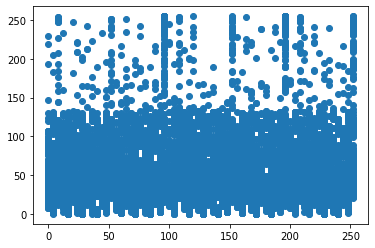

In [352]:
plt.scatter(un_r_3,g_3)
plt.show()

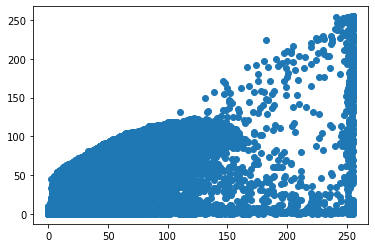

In [353]:
plt.scatter(r_3,b_3)
plt.show()

In [354]:
## red, blue의 공분산 구하기, 공분산을 구하기 위하여 1차원으로 변환
print(r_33)
cov_rb = np.cov(r_33,b_33)

print(cov_rb)
print(cov_rb[0,1])
# correlated_rg = n
print(np.corrcoef(r_33,b_33))


#eigen value, eigen vector 
values, vectors = np.linalg.eig(cov_rb)
print('eigen values',values)
print('-------')
print('eigen vectors',vectors)


# 서로 uncorrelated이 되도록 변환처리
r_3_avg = np.mean(r_33)
print(r_3_avg)
r_3_var = np.var(r_33)
print(r_3_var)
un_r_33 = 100*r_33 + 40
un_r_3 = 100 * r_3 + 40
print(np.corrcoef(un_r_33,b_33))

[2 3 3 ... 0 2 2]
[[1426.36702552  780.84056904]
 [ 780.84056904 1223.57172853]]
780.8405690392323
[[1.        0.5910606]
 [0.5910606 1.       ]]
eigen values [2112.36602255  537.5727315 ]
-------
eigen vectors [[ 0.75125755 -0.66000916]
 [ 0.66000916  0.75125755]]
30.042068481445312
1426.3452608825173
[[1.00000000e+00 2.69413077e-04]
 [2.69413077e-04 1.00000000e+00]]


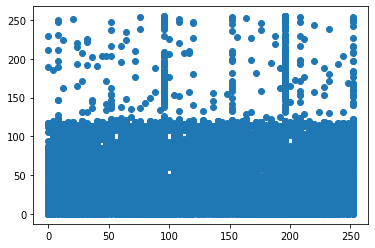

In [355]:
plt.scatter(un_r_3,b_3)
plt.show()

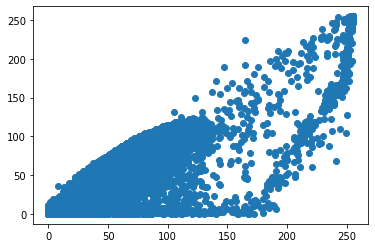

In [356]:
plt.scatter(g_3,b_3)
plt.show()

In [368]:
## greeb, blue의 공분산 구하기, 공분산을 구하기 위하여 1차원으로 변환
print(g_33)
cov_rb = np.cov(g_33,b_33)

print(cov_gb)
print(cov_gb[0,1])
# correlated_rg = n
print(np.corrcoef(g_33,b_33))


#eigen value, eigen vector 
values, vectors = np.linalg.eig(cov_gb)
print('eigen values',values)
print('-------')
print('eigen vectors',vectors)


# 서로 uncorrelated이 되도록 변환처리
g_3_avg = np.mean(g_33)
print(g_3_avg)
g_3_var = np.var(g_33)
print(g_3_var)
un_g_33 = 100*g_33 + 39.995
un_g_3 = 100 * g_3 + 39.995
print(np.corrcoef(un_g_33,b_33))

[5 6 6 ... 0 0 0]
[[5258.00801691 2769.88517225]
 [2769.88517225 1703.14932515]]
2769.885172251763
[[1.         0.86481984]
 [0.86481984 1.        ]]
eigen values [6771.70597745  189.45136461]
-------
eigen vectors [[ 0.87751554 -0.47954821]
 [ 0.47954821  0.87751554]]
30.658462524414062
1141.4234064740594
[[1.         0.03017701]
 [0.03017701 1.        ]]


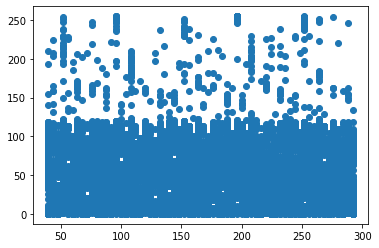

In [369]:
plt.scatter(un_g_33,b_33)
plt.show()

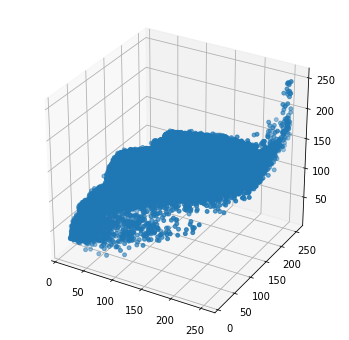

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
c = np.random.randint(-128,128,size=(256,))

ax.scatter(r_33,g_33,b_33,marker='o',s=15,cmap='coolwarm')

In [371]:
rgb_3 = np.concatenate((r_3,g_3,b_3),axis=1)
cov_rgb = np.cov(rgb_3)

In [372]:
print(cov_rgb.shape)

(65536, 65536)


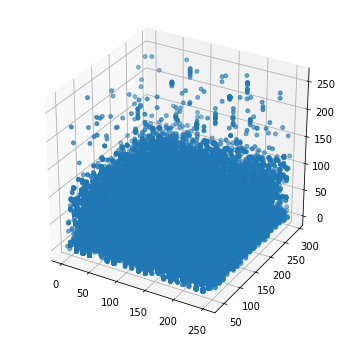

In [373]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
c = np.random.randint(-128,128,size=(256,))

ax.scatter(un_r_33,un_g_33,b_33,marker='o',s=15,cmap='coolwarm')

### 2. 관찰 결과를 반영한 2가지 이상의 패턴인식 방법을 소개(과제2와 다른 방법)하고 과제 2의 데이터를 이용하여 그 성능을 비교하여 보시오. (새로 변환된 데이터를 이용하여 훈련용, 인식용 데이터 각각의 confusion matrix 그려봄)

In [241]:
!pwd

/content/drive/MyDrive/패턴인식론


In [242]:
%cd data

/content/drive/MyDrive/패턴인식론/data


In [243]:
data = []
y = []
for i in range(20):
    img=cv2.imread('./새벽/{}.png'.format(i))
    img = cv2.resize(img,(256,256))
    img = img.reshape(-1)
    data.append(img)
    y.append(0)
for i in range(20):
    img=cv2.imread('./아침/{}.png'.format(i))
    img = cv2.resize(img,(256,256))
    img = img.reshape(-1)
    data.append(img)
    y.append(1)
for i in range(20):
    img=cv2.imread('./오후/{}.png'.format(i))
    img = cv2.resize(img,(256,256))
    img = img.reshape(-1)
    data.append(img)
    y.append(2)
for i in range(20):
    img=cv2.imread('./밤/{}.png'.format(i))
    img = cv2.resize(img,(256,256))
    img = img.reshape(-1)
    data.append(img)
    y.append(3)

In [244]:
import torch

In [245]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data,y,test_size=0.2,random_state=7)
print(len(X_train),len(Y_train))

64 64


In [275]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

kn = KNeighborsClassifier(n_neighbors=4)
kn.fit(X_train,Y_train)
pred = kn.predict(X_test)
accuracy = accuracy_score(Y_test, pred)
print('KNN 포레스트 정확도: {:.4f}'.format(accuracy))

rf_clf = RandomForestClassifier(n_estimators=10,max_depth=9)
rf_clf.fit(X_train, Y_train)
pred1 = rf_clf.predict(X_test)
accuracy1 = accuracy_score(Y_test, pred1)
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy1))

KNN 포레스트 정확도: 0.6250
랜덤 포레스트 정확도: 0.6875


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



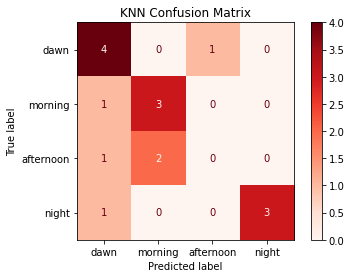

In [281]:
from sklearn.metrics import plot_confusion_matrix

labels = ['dawn', 'morning', 'afternoon','night']
disp = plot_confusion_matrix(kn, 
                             X_test, Y_test, 
                             display_labels=labels, 
                             cmap=plt.cm.Reds, 
                             normalize=None)
disp.ax_.set_title('KNN Confusion Matrix');

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



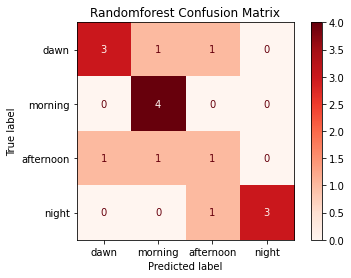

In [382]:
from sklearn.metrics import plot_confusion_matrix

labels = ['dawn', 'morning', 'afternoon','night']
disp = plot_confusion_matrix(rf_clf, 
                             X_test, Y_test, 
                             display_labels=labels, 
                             cmap=plt.cm.Reds, 
                             normalize=None)
disp.ax_.set_title('Randomforest Confusion Matrix');